# Examples with adoptive Adams method
## example 1

In [19]:
load("fdm.sage")

In [20]:
var("x,t")
x_exact=-t^2 - 2*t + 2*e^t - 2
pr1=Initial_problem(x,t^2+x,0,1)
P=adams_adaptive(pr1, h=0.1)

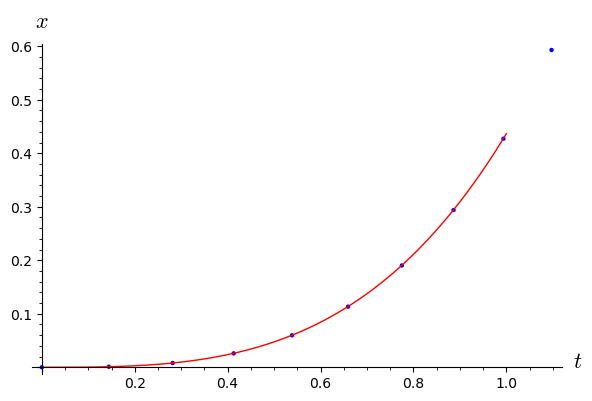

In [21]:
P.plot(t,x) + plot(x_exact,(0,1),color='red')

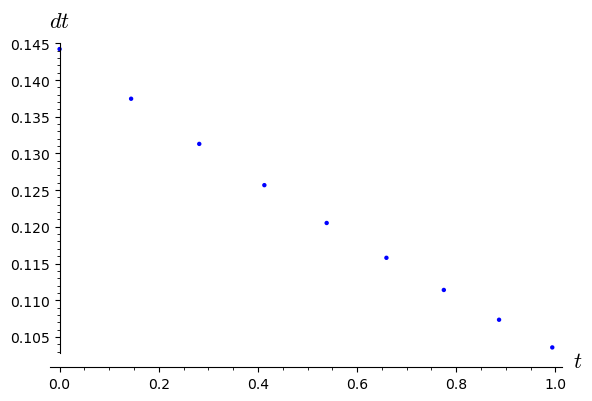

In [22]:
P.plot_dt()

In [23]:
L=[adams_adaptive(pr1, h=1/10/2^n) for n in range(10)]

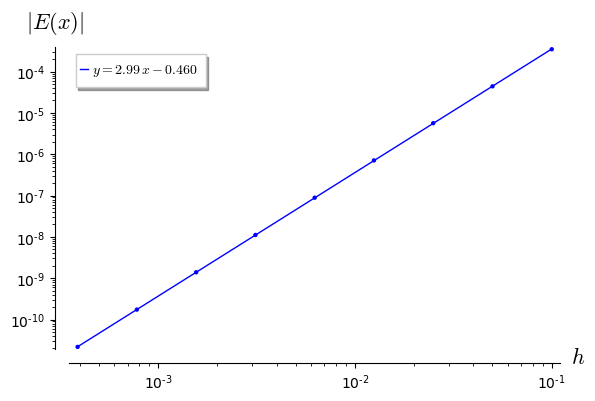

In [25]:
richardson_plot(L,x,0.9)

In [24]:
richardson(L[0],L[1],x,0.8)

[0.211043594946293, -0.0000357130926594522]

In [26]:
L[1].value(x,0.8) - RR(x_exact.subs(t=0.8))

-0.0000382620386426558

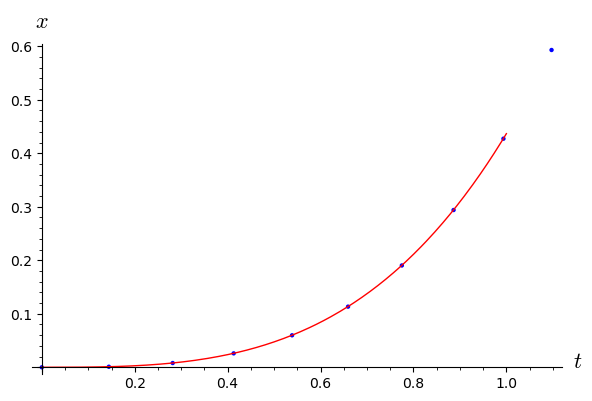

In [28]:
PP=adams_adaptive(pr1, h=0.1,r=3)
P.plot(t,x) + plot(x_exact,(0,1),color='red')

In [30]:
L=[adams_adaptive(pr1, h=1/10/2^n, r=3) for n in range(10)]

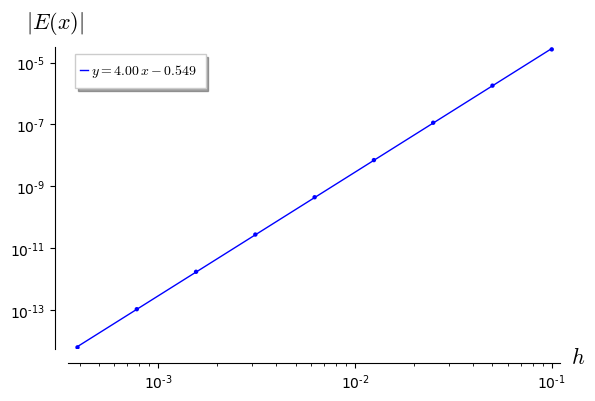

In [31]:
richardson_plot(L,x,0.9)

In [32]:
richardson(L[0],L[1],x,0.8)

[0.211080408634086, -1.50893929191653e-6]

In [33]:
L[1].value(x,0.8) - RR(x_exact.subs(t=0.8))

-1.44835084980866e-6

## Example 2

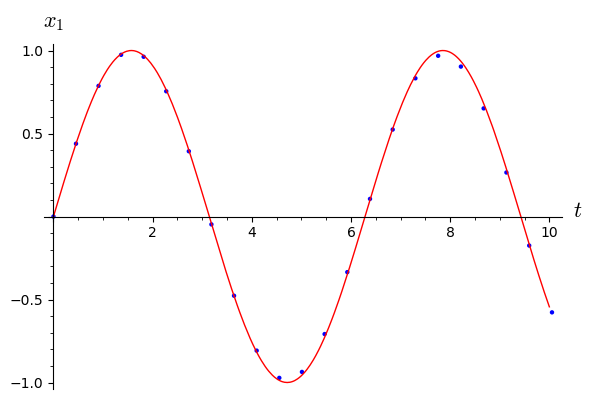

In [34]:
var("x1,x2,t")
pr2=Initial_problem([x1,x2], [x2,-x1],[0,1], 10)
P=adams_adaptive(pr2, h=1/4)
P.plot(t,x1) + plot(sin,(0,10),color='red')

In [35]:
L=[adams_adaptive(pr2, h=1/4/2^n) for n in range(10)]

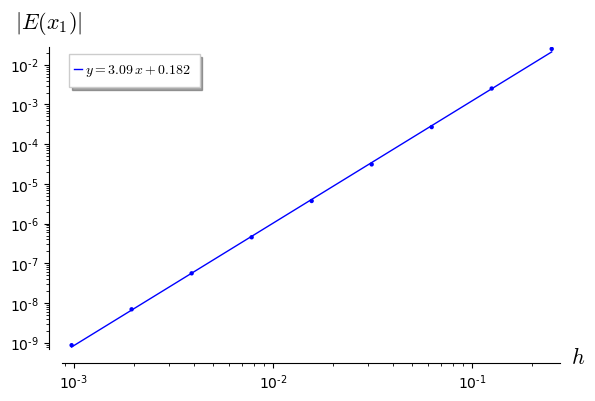

In [36]:
richardson_plot(L,x1,9)

In [37]:
richardson(L[-3],L[-2],x1,9)

[0.412118484375421, -8.69428719494993e-10]

In [38]:
L[-2].value(x1,9)-sin(9).n()

-8.66335503335591e-10

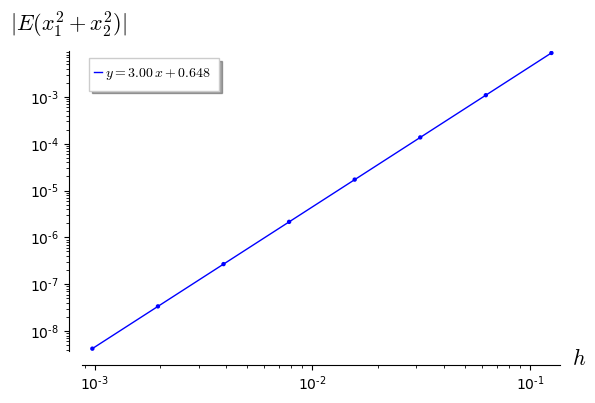

In [39]:
richardson_plot(L[1:],x1^2+x2^2,9)

In [40]:
richardson(L[-1],L[-2],x1^2+x2^2-1,9)

[-5.23893040060841e-10, -5.23894197864852e-10]

## Example 3

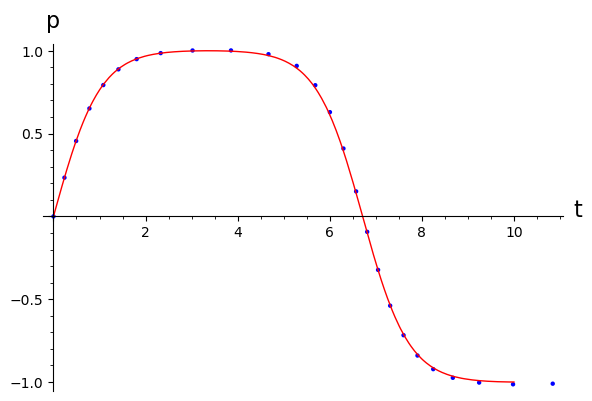

In [41]:
var("p,q,r,t")
k=0.99
pr3=Initial_problem([p,q,r], [q*r,-p*r,-k^2*p*q], [0,1,1], 10)
P=adams_adaptive(pr3, h=1/4)
P.plot(t,p)+plot(jacobi('sn', t, k^2),(t,0,10), color='red')

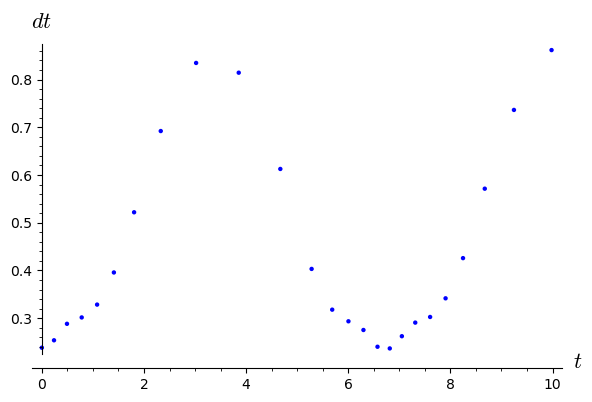

In [42]:
P.plot_dt()

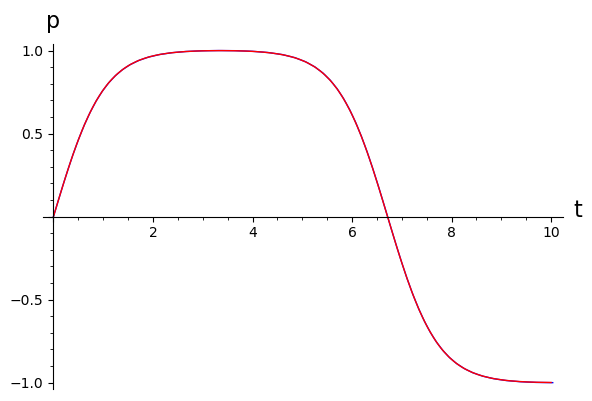

In [43]:
P=adams_adaptive(pr3, h=1/10)
P.plot(t,p)+plot(jacobi('sn', t, k^2),(t,0,10), color='red')

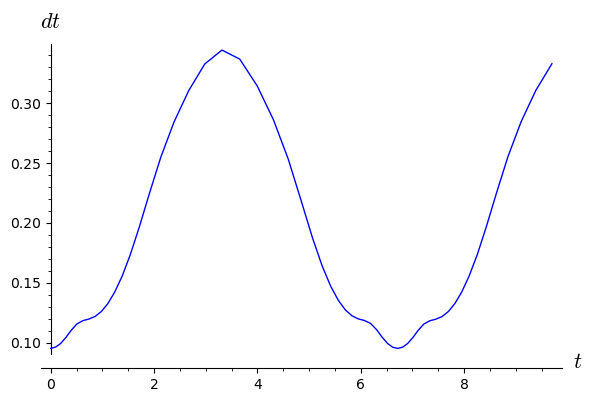

In [44]:
P.plot_dt()

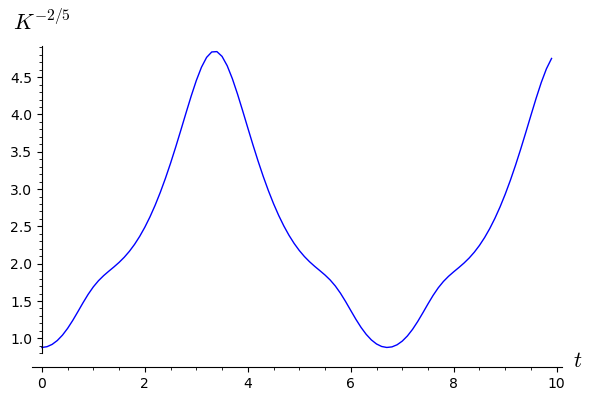

In [45]:
K=curvature([q*r,-p*r,-k^2*p*q],[p,q,r]).subs([p==jacobi('sn', t, k^2),q==jacobi('cn', t, k^2), r==jacobi('dn', t, k^2)])
line([[0.1*m,K.subs(t=0.1*m)^(-2/5)] for m in range(100)], axes_labels=['$t$','$K^{-2/5}$'])

In [46]:
L=[adams_adaptive(pr3, h=1/4/2^n) for n in range(10)]

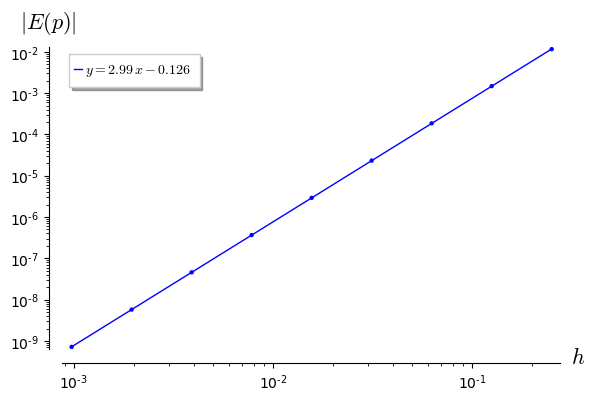

In [47]:
richardson_plot(L,p,9)

In [48]:
richardson(L[3],L[4],p,9)

[-0.983742403638134, -2.91251782521699e-6]

In [49]:
richardson(L[3],L[4],p,9)[0]-jacobi('sn', 9, k^2)

-2.91556109421887e-6